### Baseline Neural Network Model 
This notebook contains a baseline neural network with one hidden layer and 100 nodes.

The notebook also contains the comparision of different versions of this model with different hyperparameter.

And finally, the pediction results on test images

In [11]:
##### Import libraries
from keras.models import Sequential
from keras.models import load_model, model_from_json
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import time
from datetime import datetime
from matplotlib import pyplot
from SaveModel import save_arch, save_history
import pickle
from keras.models import load_model

In [4]:
##### Import function from another py script
from DataPreparation import load

In [78]:
##### Callback for Tensorboard
tbCallBack = keras.callbacks.TensorBoard(log_dir='D:\GRAD_SCHOOL\Spring2017\CognitiveComputing&AI\midterm\Graph', histogram_freq=0, write_graph=True, write_images=True)

In [5]:
####### Load and display the data 
X, y = load()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [7]:
##### 1. Build model with following hyperparameters
model_name = 'model1'
nb_epoch = 100
validation_split = 0.2
lr = 0.01
momentum = 0.9
nesterov = True
loss_method = 'mean_squared_error'
#arch_path = 'model/' + model_name + '-arch-' + str(nb_epoch) + '.json'
#weights_path = 'model/' + model_name + '-weights-' + str(nb_epoch) + '.hdf5'

# Build model
model1 = Sequential()
model1.add(Dense(100, input_dim=9216))
model1.add(Activation('relu'))
model1.add(Dense(30))


sgd = SGD(lr=lr, momentum=momentum, nesterov=nesterov)
model1.compile(loss=loss_method, optimizer=sgd)

start_time = time.time() #start time
print('start_time: %s' % (datetime.now()))
hist1 = model1.fit(X, y, nb_epoch=nb_epoch, validation_split=validation_split)
#print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
print('end_time: %s, duration(min): %d' % (datetime.now(), int(time.time()-start_time) / 60)) #end time

scores = model1.evaluate(X, y, verbose=0)
print(scores)

# serialize model to JSON
model_json = model1.to_json()
with open("final_model/"+"model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save_weights("final_model/"+"model11.h5")
print("Saved model to disk")


start_time: 2017-03-18 11:15:39.792101
Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 1s - loss: 0.0600 - val_loss: 0.0131
Epoch 2/100
1712/1712 [==============================] - 1s - loss: 0.0126 - val_loss: 0.0104
Epoch 3/100
1712/1712 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0095
Epoch 4/100
1712/1712 [==============================] - 2s - loss: 0.0091 - val_loss: 0.0085
Epoch 5/100
1712/1712 [==============================] - 2s - loss: 0.0084 - val_loss: 0.0086
Epoch 6/100
1712/1712 [==============================] - 1s - loss: 0.0081 - val_loss: 0.0080
Epoch 7/100
1712/1712 [==============================] - 1s - loss: 0.0078 - val_loss: 0.0078
Epoch 8/100
1712/1712 [==============================] - 1s - loss: 0.0073 - val_loss: 0.0080
Epoch 9/100
1712/1712 [==============================] - 1s - loss: 0.0070 - val_loss: 0.0077
Epoch 10/100
1712/1712 [==============================] - 2s - loss:

In [25]:
##### 2. Build model with following hyperparameters

nb_epoch = 100
validation_split = 0.2
#lr = 0.01
#momentum = 0.0
#nesterov = False
loss_method = 'mean_squared_error'

# Build model
model1_v2 = Sequential()
model1_v2.add(Dense(100, input_dim=9216))
model1_v2.add(Activation('relu'))
model1_v2.add(Dense(30))

#sgd = SGD(lr=lr, momentum=momentum, nesterov=nesterov)
model1_v2.compile(loss=loss_method, optimizer='sgd')

start_time = time.time() #start time
print('start_time: %s' % (datetime.now()))
hist2 = model1_v2.fit(X, y, nb_epoch=nb_epoch, validation_split=validation_split)
print('end_time: %s, duration(min): %d' % (datetime.now(), int(time.time()-start_time) / 60)) #end time

scores = model1_v2.evaluate(X, y, verbose=0)
print(scores)

# serialize model to JSON
model_json = model1_v2.to_json()
with open("final_model/"+"model1_v2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1_v2.save_weights("final_model/"+"model1_v2.h5")
print("Saved model to disk")

start_time: 2017-03-17 03:37:45.079368
Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 1s - loss: 0.0514 - val_loss: 0.0259
Epoch 2/100
1712/1712 [==============================] - 1s - loss: 0.0235 - val_loss: 0.0212
Epoch 3/100
1712/1712 [==============================] - 1s - loss: 0.0204 - val_loss: 0.0192
Epoch 4/100
1712/1712 [==============================] - 1s - loss: 0.0186 - val_loss: 0.0191
Epoch 5/100
1712/1712 [==============================] - 1s - loss: 0.0181 - val_loss: 0.0177
Epoch 6/100
1712/1712 [==============================] - 0s - loss: 0.0173 - val_loss: 0.0165
Epoch 7/100
1712/1712 [==============================] - 0s - loss: 0.0161 - val_loss: 0.0174
Epoch 8/100
1712/1712 [==============================] - 0s - loss: 0.0154 - val_loss: 0.0150
Epoch 9/100
1712/1712 [==============================] - 0s - loss: 0.0151 - val_loss: 0.0149
Epoch 10/100
1712/1712 [==============================] - 0s - loss:

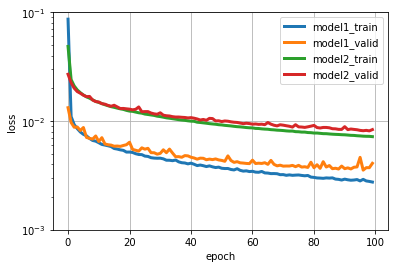

In [65]:
##### Comparing Model 1 and 2
pyplot.plot(hist1.history['loss'], linewidth=3, label='model1_train')
pyplot.plot(hist1.history['val_loss'], linewidth=3, label='model1_valid')
pyplot.plot(hist2.history['loss'], linewidth=3, label='model2_train')
pyplot.plot(hist2.history['val_loss'], linewidth=3, label='model2_valid')
pyplot.grid()
pyplot.legend()
pyplot.xlabel('epoch')
pyplot.ylabel('loss')
pyplot.ylim(1e-3, 1e-1)
pyplot.yscale('log')
pyplot.show()

In [9]:
########## Prediction from Model 1 ----------- rough work
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

X, _ = load(test=True)
y_pred = model1.predict(X)

fig = pyplot.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(4):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

pyplot.show()

ImageId    1783
Image      1783
dtype: int64


NameError: name 'model_from_json' is not defined

ImageId    1783
Image      1783
dtype: int64
Loaded model from disk


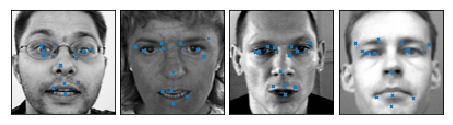

In [13]:
########## Prediction from Model 2
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)
    #axis.plot(y[0::2] * 48 + 48, y[1::2] * 48 + 48, 'bo-') # connecting the points (not important)

X, _ = load(test=True)

#X = X.reshape(X.shape[0], 96, 96, 1)
# load json and create model
json_file = open('final_model/'+'model1_v2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('final_model/'+"model1_v2.h5")
print("Loaded model from disk")

y_pred = loaded_model.predict(X)

fig = pyplot.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(4):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

pyplot.show()